In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline

In [2]:
opsdb = maf.OpsimDatabase(get_baseline())
runName = os.path.split(get_baseline())[-1].replace('.db','')

In [3]:
runName

'baseline_v2.0_10yrs'

In [4]:
# Convenience method that provides some useful info
filterlist, colors, orders, sqls, metas = maf.filterList(all=False)

In [5]:
bundleDict = {}
for f in filterlist:
    # Median value of all visits in that filter
    m = maf.MedianMetric(col='fiveSigmaDepth')
    s = maf.UniSlicer()
    b = maf.MetricBundle(m, s, sqls[f], metadata=metas[f], runName=runName)
    bundleDict[f'Median {f}'] = b
    # Make the histogram 
    m = maf.CountMetric(col='fiveSigmaDepth', metricName='Histogram Depth')
    s = maf.OneDSlicer(sliceColName='fiveSigmaDepth', binsize=0.1)
    b = maf.MetricBundle(m, s, sqls[f], metadata=metas[f], runName=runName)
    bundleDict[f'Histogram {f}'] = b
    # Make a sky map - take the median value at each point
    m = maf.MedianMetric(col='fiveSigmaDepth')
    s = maf.HealpixSlicer(nside=64)
    b = maf.MetricBundle(m, s, sqls[f], metadata=metas[f], runName=runName)
    bundleDict[f'Skymap {f}'] = b

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [6]:
g = maf.MetricBundleGroup(bundleDict, opsdb, outDir='depths')
g.runAll()

Querying database observations with constraint filter = "u" for columns ['fieldDec', 'rotSkyPos', 'fiveSigmaDepth', 'fieldRA']
Found 134566 visits
Running:  ['Median u']
Completed metric generation.
Running:  ['Histogram u']
Completed metric generation.
Running:  ['Skymap u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "g" for columns ['fieldDec', 'rotSkyPos', 'fiveSigmaDepth', 'fieldRA']
Found 217817 visits
Running:  ['Median g']
Completed metric generation.
Running:  ['Histogram g']
Completed metric generation.
Running:  ['Skymap g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "y" for columns ['fieldDec', 'rotSkyPos', 'fiveSigmaDepth', 'fieldRA']
Found 391632 visits
Running:  ['Median y']
Completed metric generation.
Running:  ['Histogram y']
Completed metric generation.
Running:

0.0 180.0 -180.0 180.0


[23.923410062944367]


{'SkyMap': 2, 'Histogram': 3}

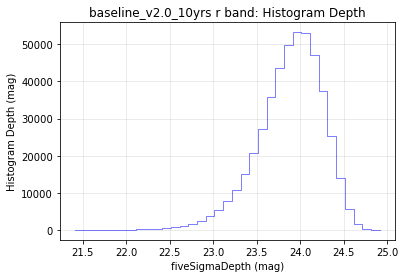

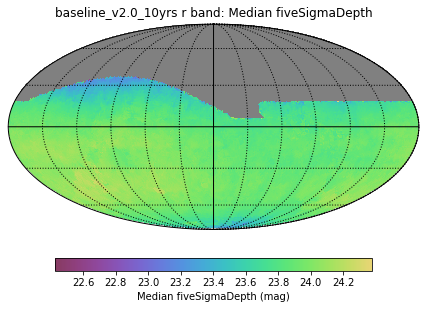

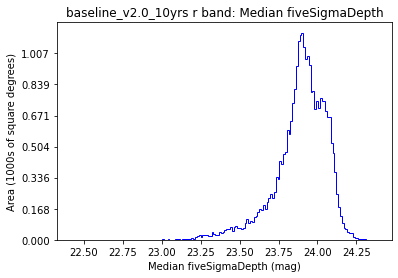

In [7]:
# Example of r band info

# Median depth of all visits
print(bundleDict['Median r'].metricValues)
# histogram 
bundleDict['Histogram r'].plot()
# sky map
bundleDict['Skymap r'].plot()

1

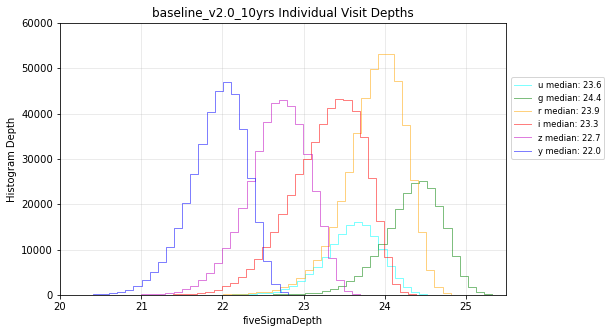

In [16]:
# So let's make a pretty set of plots - all of the histograms together

ph = maf.PlotHandler(outDir='depths', thumbnail=False, figformat='jpg')

# color-code the histograms and add the median depth value to the label
for f in filterlist:
    plotDict = {'color': colors[f],
                'label': f"{f} median: {bundleDict[f'Median {f}'].summaryValues['Identity']:.1f}"}
    bundleDict[f'Histogram {f}'].setPlotDict(plotDict)

ph.setMetricBundles([bundleDict[k] for k in bundleDict if 'Histogram' in k])
ph.plot(plotFunc=maf.OneDBinnedData(), plotDicts={'figsize': (8,5), 'legendloc': (1.01, 0.5), 
                                                  'title': f"{runName} Individual Visit Depths",
                                                  'xMin': 20, 'xMax': 25.5, 'yMin': 0, 'yMax': 60000})
# (note that this is saved in the output directory too)

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


1

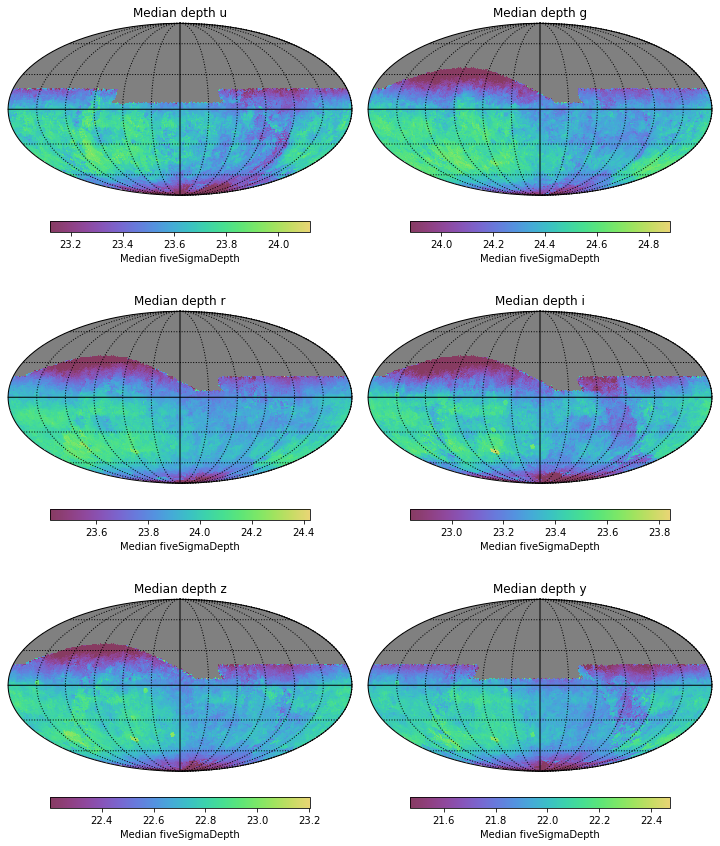

In [17]:
# And skymaps 

plotBundles = []
plotDicts = []
k = 1
for f in filterlist:
    plotBundles.append(bundleDict[f'Skymap {f}'])
    median = bundleDict[f'Median {f}'].summaryValues['Identity']
    plotDicts.append({'subplot': (3, 2, k), 'nTicks': 5,
                      'colorMin': median + 0.5, 'colorMax': median - 0.5,
                      'figsize': (10, 12), 'title': f'Median depth {f}',
                     'legendloc': None, 'label': None, 'noGraticule': True})
    k += 1
del plotDicts[-1]['noGraticule']
    
ph.setMetricBundles(plotBundles)

ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts=plotDicts)

In [20]:
filterlist, colors, orders, sqls, metas = maf.filterList(all=True)
bundleDict2 = {}
for f in filterlist:
    # Number of all visits in that filter
    m = maf.CountMetric(col='observationStartMJD', metricName='NVisits')
    s = maf.UniSlicer()
    b = maf.MetricBundle(m, s, sqls[f], metadata=metas[f], runName=runName)
    bundleDict2[f'Total {f}'] = b
    # Make a sky map - count total number value at each point
    m = maf.CountMetric(col='observationStartMJD', metricName='Nvisits')
    s = maf.HealpixSlicer(nside=64)
    b = maf.MetricBundle(m, s, sqls[f], metadata=metas[f], runName=runName)
    bundleDict2[f'Skymap {f}'] = b

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [24]:
# Normally when running metrics in MAF, we would batch this up with the metrics above, to save overhead
g = maf.MetricBundleGroup(bundleDict2, opsdb, outDir='depths')
g.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'rotSkyPos', 'fieldRA', 'observationStartMJD'].
Found 2086980 visits
Running:  ['Total all']
Completed metric generation.
Running:  ['Skymap all']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "u" for columns ['fieldDec', 'rotSkyPos', 'fieldRA', 'observationStartMJD']
Found 134566 visits
Running:  ['Total u']
Completed metric generation.
Running:  ['Skymap u']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "g" for columns ['fieldDec', 'rotSkyPos', 'fieldRA', 'observationStartMJD']
Found 217817 visits
Running:  ['Total g']
Completed metric generation.
Running:  ['Skymap g']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint fil

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


1

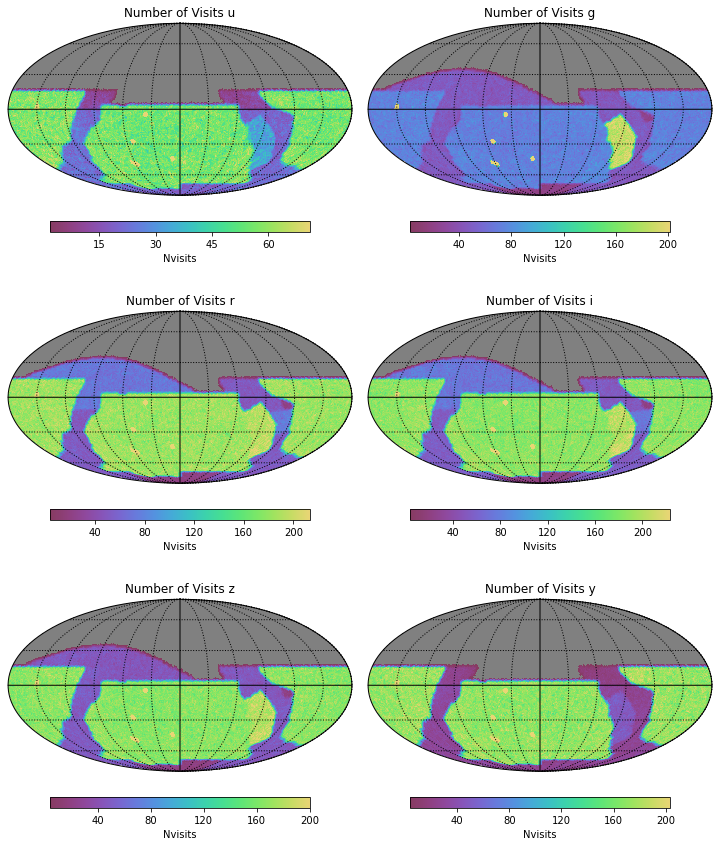

In [27]:
plotBundles = []
plotDicts = []
k = 1
for f in filterlist:
    if f == 'all': 
        continue
    plotBundles.append(bundleDict2[f'Skymap {f}'])
    median = np.median(bundleDict2[f'Skymap {f}'].metricValues.compressed())
    plotDicts.append({'subplot': (3, 2, k), 'nTicks': 6,
                      'percentileClip': 99,
                      'figsize': (10, 12), 'title': f'Number of Visits {f}',
                     'legendloc': None, 'label': None, 'noGraticule': True})
    k += 1
del plotDicts[-1]['noGraticule']
    
ph.setMetricBundles(plotBundles)

ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts=plotDicts)

0.0 180.0 -180.0 180.0


1

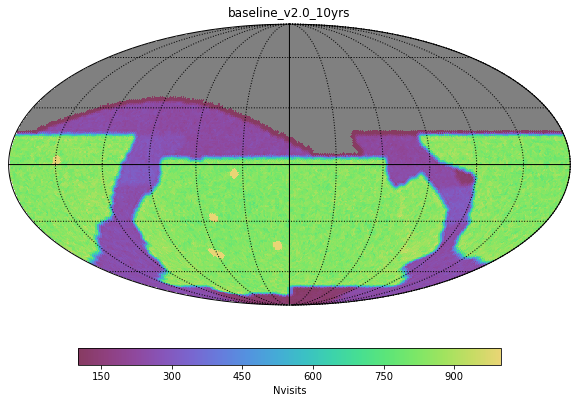

In [32]:
f = 'all'
ph.setMetricBundles([bundleDict2[f'Skymap {f}']])
plotDicts = {'subplot': (1, 1, 1), 'nTicks': 6,
                  'colorMin': 100, 'colorMax': 1000, 'xlabel': 'Nvisits',
                  'figsize': (8, 6), 'title': f'{runName}',
                 'legendloc': None, 'label': None,}
ph.plot(plotFunc=maf.HealpixSkyMap(), plotDicts=plotDicts)